In [31]:
#Importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [2]:
#importing given data set
df = pd.read_csv("disaster_tweets_data.csv", encoding='ISO-8859-1')
df.head()

,tweets,target
0,our deeds are the reason of this #earthquake m...,1
1,forest fire near la ronge sask. canada,1
2,all residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,just got sent this photo from ruby #alaska as ...,1


In [3]:
#gives information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  96 non-null     object
 1   target  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [4]:
#used to view some basic statistical details 
df.describe()

,target
count,96.000000
mean,0.510417
std,0.502516
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [5]:
#checking for null values
df.isnull().sum()

tweets    0
target    0
dtype: int64

## Pre Procesessing

### Tokenization
* Tokenization in NLP is the process by which a large quantity of text is divided into smaller parts called tokens

In [6]:
# Loading packages for Tokenzation
import nltk
from nltk.tokenize import word_tokenize

In [7]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('corpus')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to C:\Users\Oorja
[nltk_data]     Saxena\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Oorja
[nltk_data]     Saxena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading corpus: Package 'corpus' not found in index
[nltk_data] Downloading package wordnet to C:\Users\Oorja
[nltk_data]     Saxena\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Oorja Saxena\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [8]:
df['tweets'] = [word_tokenize(entry) for entry in df['tweets']]
df['tweets'].head()

0    [our, deeds, are, the, reason, of, this, #, ea...
1     [forest, fire, near, la, ronge, sask, ., canada]
2    [all, residents, asked, to, 'shelter, in, plac...
3    [13,000, people, receive, #, wildfires, evacua...
4    [just, got, sent, this, photo, from, ruby, #, ...
Name: tweets, dtype: object

## Lower Case

In [9]:
# converting the list to string
df["tweets"]=df["tweets"].apply(str)

In [10]:
df["tweets"] = [entry.lower() for entry in df["tweets"]]
df["tweets"].head()

0    ['our', 'deeds', 'are', 'the', 'reason', 'of',...
1    ['forest', 'fire', 'near', 'la', 'ronge', 'sas...
2    ['all', 'residents', 'asked', 'to', "'shelter"...
3    ['13,000', 'people', 'receive', '#', 'wildfire...
4    ['just', 'got', 'sent', 'this', 'photo', 'from...
Name: tweets, dtype: object

## Punctuations

In [11]:
df["tweets"] = df["tweets"].str.replace(r'[^\w\s]+', ' ').str.strip()
df.head()

,tweets,target
0,"['our', 'deeds', 'are', 'the', 'reason', 'of',...",1
1,"['forest', 'fire', 'near', 'la', 'ronge', 'sas...",1
2,"['all', 'residents', 'asked', 'to', ""'shelter""...",1
3,"['13,000', 'people', 'receive', '#', 'wildfire...",1
4,"['just', 'got', 'sent', 'this', 'photo', 'from...",1


## Stop Words & Lemmatization

* Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language and gives its dictionary word

* Each row has to go through these both so we are going to create a function and add those values into another feature [Final Text]

In [12]:
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet

In [13]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['j'] = wn.ADJ
tag_map['v'] = wn.VERB
tag_map['v'] = wn.ADV

In [14]:
# Storing all the stopwords into variables
stop_words = set(stopwords.words("english"))
print(stop_words)

{'ve', 'i', 'now', 'so', 'to', 't', 'should', 'ain', 'myself', 'own', 'were', 'too', 'she', "that'll", 'll', 'do', "don't", 'needn', 'd', 'them', 'at', 'being', 'ours', 'the', 'very', 'with', 'can', 'isn', "isn't", "you've", "should've", 'himself', 'couldn', 'mustn', 'few', 'theirs', 'but', 'above', 'he', 'did', 'which', 'our', 'for', "won't", 'in', 'those', 'down', "aren't", 'mightn', 'off', 'not', 'ma', 'will', 'herself', 'had', 'nor', 'who', 'been', 'further', 'hasn', 'haven', 'shan', 'on', "wouldn't", 'my', 's', 'am', 'you', 'is', 'having', 'be', 'before', 'most', "doesn't", 'ourselves', 'or', 'because', 'hadn', 'didn', 'more', "didn't", 'an', "wasn't", "it's", 'their', 'don', 'out', 'your', 'below', 'whom', 'we', 'when', 'doesn', 'doing', "needn't", 'then', 'until', 'of', 'are', 'that', 'has', "haven't", 'it', "hasn't", 'while', 're', "shouldn't", 'hers', 'why', "you'd", 'if', 'up', 'this', 'any', 'as', 'no', 'where', 'over', 'yourselves', 'does', 'some', 'other', 'between', 'your

## Splitting into Train and Test Data

In [15]:
X = df["tweets"]
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train

40    ['check', 'these', 'out', ':', 'http', ':', '/...
67    ["'", 'i', 'ca', "n't", 'have', 'kids', 'cuz',...
15                     ['what', "'s", 'up', 'man', '?']
68    ['accident', 'on', 'i-24', 'w', '#', 'nashvill...
88    ['accident', 'left', 'lane', 'blocked', 'in', ...
                            ...                        
60    ['revel', 'in', 'yours', 'wmv', 'videos', 'by'...
71    ['#', 'stlouis', '#', 'caraccidentlawyer', 'sp...
14    ['damage', 'to', 'school', 'bus', 'on', '80', ...
92    ['8/6/2015', '@', '2:09', 'pm', ':', 'traffic'...
51    ['man', 'wife', 'get', 'six', 'years', 'jail',...
Name: tweets, Length: 76, dtype: object

## Count Vectorizer

In [17]:
count_vectorizer = CountVectorizer(stop_words = 'english')
X_train = count_vectorizer.fit_transform(X_train).toarray()

In [18]:
X_test  = count_vectorizer.transform(X_test).toarray()

In [19]:
print(df.shape)

(96, 2)


In [20]:
print(X_train)
print(X_train.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
(76, 443)


In [21]:
print(X_train.shape)

(76, 443)


## Naive Bayes

In [22]:
# Create and fit the random forest
rf = MultinomialNB()
rf.fit(X_train, y_train)

# Evaluate predictions
Y_pred = rf.predict(X_test)
acc_nb = round(rf.score(X_test, y_test) * 100, 2)
# Printing the Classification Report
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_nb)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 75.0
              precision    recall  f1-score   support

           0   0.600000  0.857143  0.705882         7
           1   0.900000  0.692308  0.782609        13

    accuracy                       0.750000        20
   macro avg   0.750000  0.774725  0.744246        20
weighted avg   0.795000  0.750000  0.755754        20



Predicted,0,1,All
Actual,,,
0,6,1,7
1,4,9,13
All,10,10,20


In [23]:
# create an iterator object with write permission - model.pkl
import pickle
with open('model_pkl', 'wb') as files:
    pickle.dump(rf, files)

<Axes: >

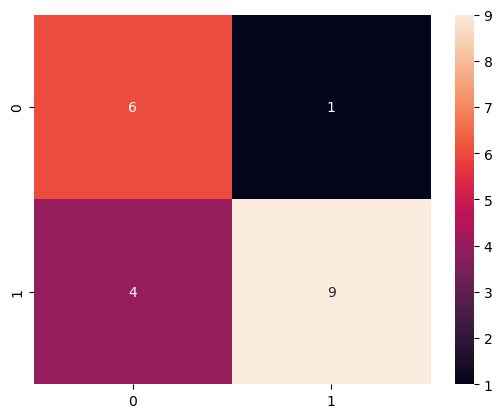

In [24]:
# confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d")
     

## Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0,)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
results = pd.DataFrame([['Logistic Regression (Lasso)', acc,prec,rec,f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.45,0.75,0.230769,0.352941


In [35]:
#Predicting Test set
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
results = pd.DataFrame([['Logistic Regression (Lasso)', acc,prec,rec,f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.45,0.75,0.230769,0.352941


Test Data Accuracy: 0.4500


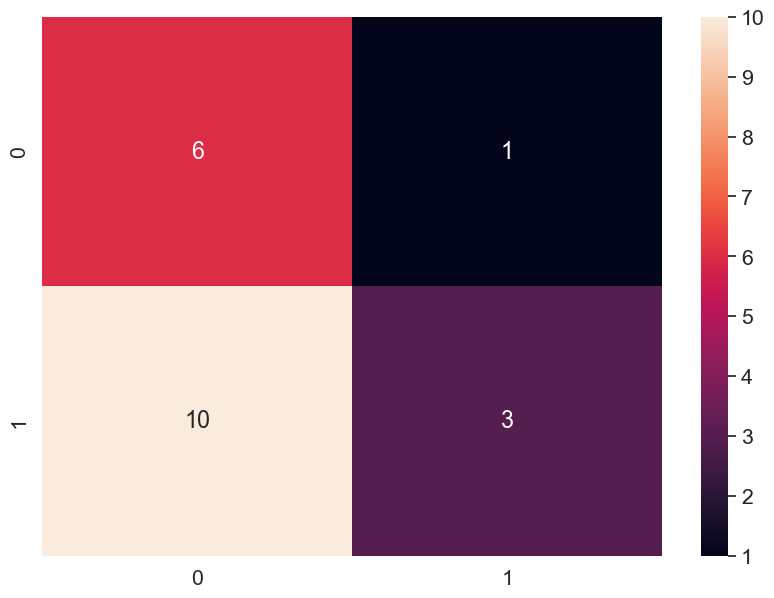

In [36]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred)) 

## KNN Classifier

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [61]:
y_pred = knn.predict(X_test)

In [62]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.35


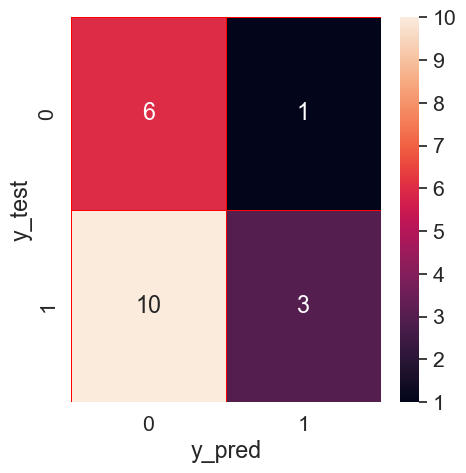

In [64]:
#confusion matrix 

import seaborn as sns 
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

* therefore , Logistic Regression has highest accuracy 